<a href="https://colab.research.google.com/github/kitzeslab/bioacoustics-cookbook/blob/main/SCB_tutorial_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCB workshop OpenSoundscape tutorial 

This tutorial will walk you through a simple example of using OpenSoundscape. We will use a Convolutional Neural Network classifier to get predictions based on audio you recorded during the workshop.

There are more tutorials available on the OpenSoundscape website  can guide you through working with Audio and Spectrograms, training a classifier, using our signal processing RIBBIT algorithm. 

 http://opensoundscape.org/en/latest/ 

## Set up

We need to install OpenSoundscape, import it and upload our audio file.

### Install OpenSoundscape
The first part of the tutorial involves installing OpenSoundscape in our google colab environment. We're using `&> /dev/null` to hide some messy long outputs - this is due to Google Colab already having a set of packages installed, and us asking it to install a new set!

On your own machine it is as simple as `pip install opensoundscape` in a clean Python 3.7 or 3.8 environment.


In [2]:
!pip install opensoundscape &> /dev/null

### Import OpenSoundscape
To make your code a bit easier to read, we will also import specific functions and classes from OpenSoundscape. 

Therefore instead of having to type `opensoundscape.audio.spectogram.Spectrogram` every time we want to make a instance of a Spectrogram object, we use `from opensoundscape.spectrogram import Spectrogram` so that we can simply type `Spectrogram`.

In [90]:
import opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

#some useful packages
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch

#set up plots to make nice big figures
plt.rcParams['figure.figsize']=[10,5]
%config InlineBackend.figure_format = 'retina'

### Load in the audio you just recorded on an audio moth
First we need to upload the audio so Google Colab can access it. After executing the cell below click the choose files button and find the audiomoth file to upload.

In [4]:
from google.colab import files

uploaded = files.upload()
files = list(uploaded.keys())
filename = files[0]

Saving pa_soundscape_60s.wav to pa_soundscape_60s.wav


Let's create an audio object, and then display a spectrogram of the first 10 seconds of our audio as a spectrogram. 

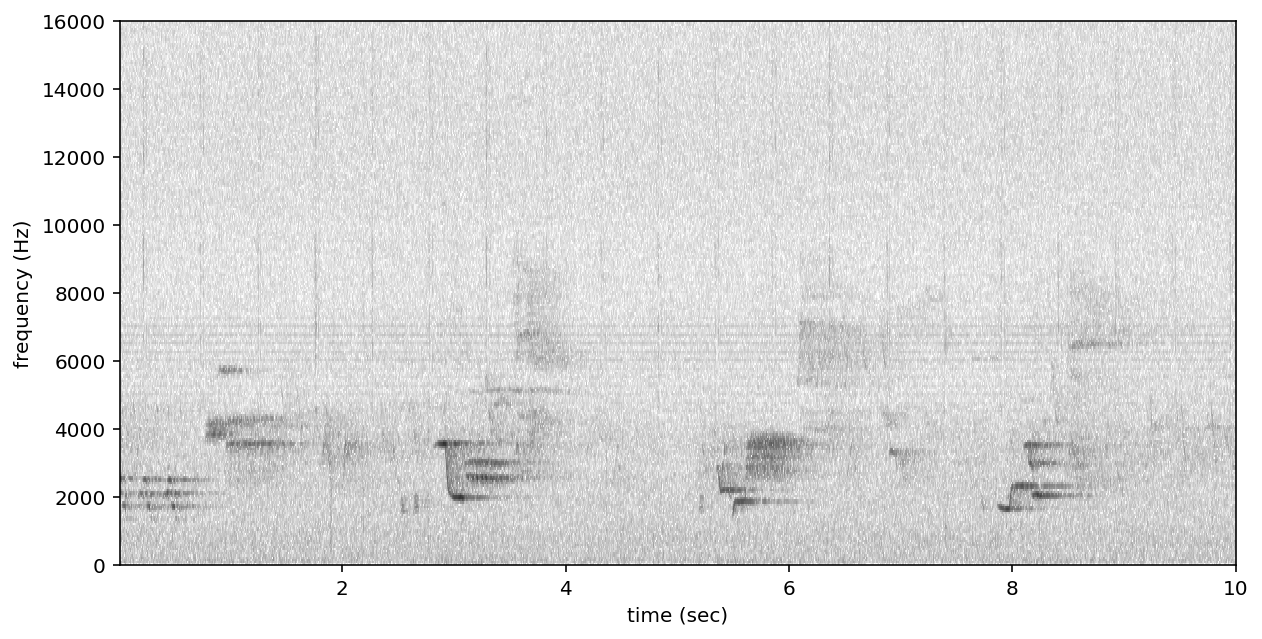

In [91]:
audio = Audio.from_file(filename,sample_rate=32000)
spectrogram = Spectrogram.from_audio(audio)
spectrogram.trim(0,10).plot()

## Use a classifier to get predictions

To save some time we trained a model already. This model is a Convolutional Neural Network (CNN) trained to recognize spectrograms of 38 bird species in 5 second long spectrograms.

This classifier is far from perfect! We will explore how well it identifies bird vocalizations later on. 

In [92]:
!wget https://pitt.box.com/shared/static/sbws0r6ce9osveozhvbpvy7gdc7r8hld.model -O trained.model &> /dev/null

In [93]:
from opensoundscape.torch.models.cnn import load_model
model = load_model("trained.model")

Let's use this model make predictions on the audio with our CNN!

The model produces scores between -inf and +inf for each class. We use a 'softmax' activation function to take these scores and make them sum to 1. These scores represent the confidence the model has that the audio segment contains a species within it, but **these are not probabilities!**


In [94]:
preds, _, _ = model.predict([filename],activation_layer='softmax')
preds

[]


Red-winged Blackbird  \
file                  start_time end_time                         
pa_soundscape_60s.wav 0.0        5.0               3.206408e-19   
                      5.0        10.0              2.302720e-23   
                      10.0       15.0              6.341028e-17   
                      15.0       20.0              1.396340e-16   
                      20.0       25.0              1.476135e-12   
                      25.0       30.0              1.032185e-28   
                      30.0       35.0              1.734063e-25   
                      35.0       40.0              1.847788e-18   
                      40.0       45.0              1.324608e-10   
                      45.0       50.0              1.357679e-09   
                      50.0       55.0              1.817657e-09   
                      55.0       60.0              9.245119e-12   

                                           Tufted Titmouse  Cedar Waxwing  \
file                  start_time end_time                                   
pa_soundscape_60s.wav 0.0        5.0          1.844591e-18   3.310332e-22   
                      5.0        10.0         9.233494e-26   5.079614e-25   
                      10.0       15.0         7.200023e-12   3.044866e-14   
                      15.0       20.0         1.133121e-17   8.723202e-20   
                      20.0       25.0         2.490827e-12   1.283881e-12   
                      25.0       30.0         6.564883e-34   2.897506e-30   
                      30.0       35.0         2.897834e-25   1.150753e-27   
                      35.0       40.0         6.544933e-18   4.787160e-22   
                      40.0       45.0         9.592933e-13   7.443021e-13   
                      45.0       50.0         9.851901e-12   1.944989e-13   
                      50.0       55.0         1.328572e-09   2.567830e-12   
                      55.0       60.0         7.915141e-10   9.602947e-14   

                                           Canada Goose  Red-Shouldered Hawk  \
file                  start_time end_time                                      
pa_soundscape_60s.wav 0.0        5.0       1.244133e-19         1.586782e-23   
                      5.0        10.0      6.373861e-26         1.722225e-30   
                      10.0       15.0      9.948014e-18         2.946677e-20   
                      15.0       20.0      7.886140e-20         2.287880e-22   
                      20.0       25.0      4.009538e-15         1.450973e-15   
                      25.0       30.0      6.840593e-30         3.856630e-35   
                      30.0       35.0      7.589697e-28         1.805862e-29   
                      35.0       40.0      4.902917e-19         1.416880e-23   
                      40.0       45.0      1.662941e-15         5.759177e-15   
                      45.0       50.0      4.987775e-14         7.521342e-15   
                      50.0       55.0      1.481286e-13         5.218274e-14   
                      55.0       60.0      5.145693e-16         9.097360e-16   

                                           Northern Cardinal         Verry  \
file                  start_time end_time                                    
pa_soundscape_60s.wav 0.0        5.0            6.470857e-17  2.189622e-16   
                      5.0        10.0           1.619685e-21  1.220076e-23   
                      10.0       15.0           6.501741e-15  2.988197e-13   
                      15.0       20.0           9.139277e-12  3.621500e-15   
                      20.0       25.0           6.565030e-06  1.764858e-10   
                      25.0       30.0           2.885618e-28  2.327813e-29   
                      30.0       35.0           1.570446e-21  3.257925e-24   
                      35.0       40.0           1.197282e-14  4.467519e-16   
                      40.0       45.0           3.765408e-01  2.735711e-10   
                      45.0       50.0         

### Examine the scores 
Lets's examine some spectrograms and their corresponding scores for Wood Thrush scores.

score for Wood Thrush class [0-1]: 1.000


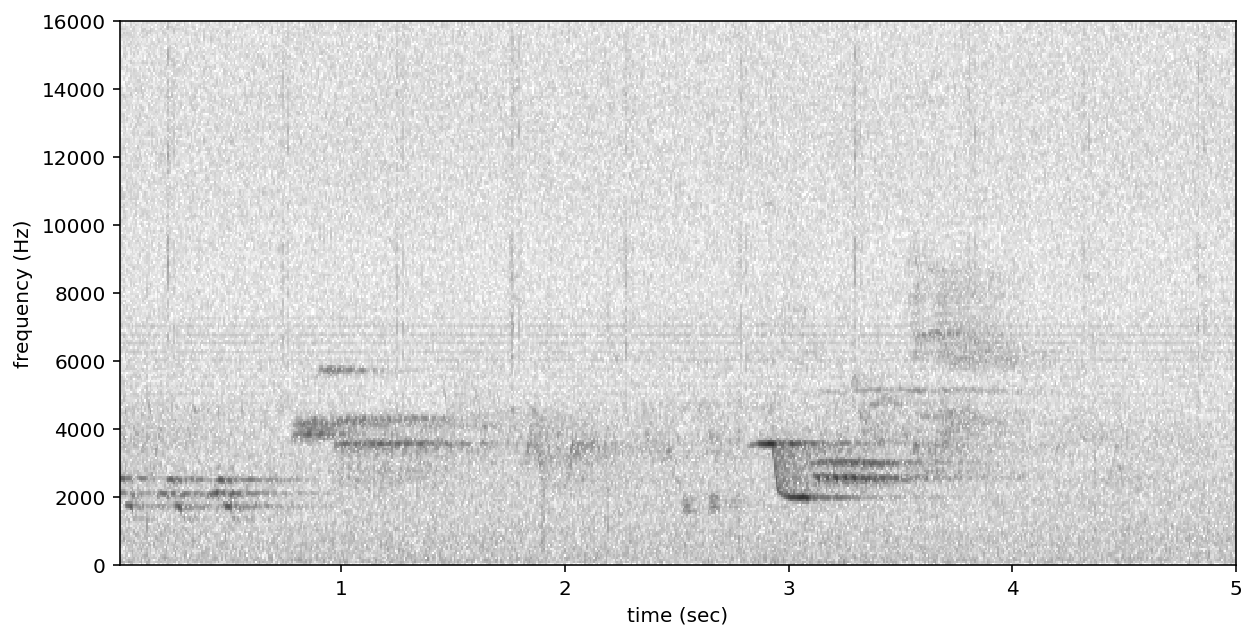

score for Wood Thrush class [0-1]: 1.000


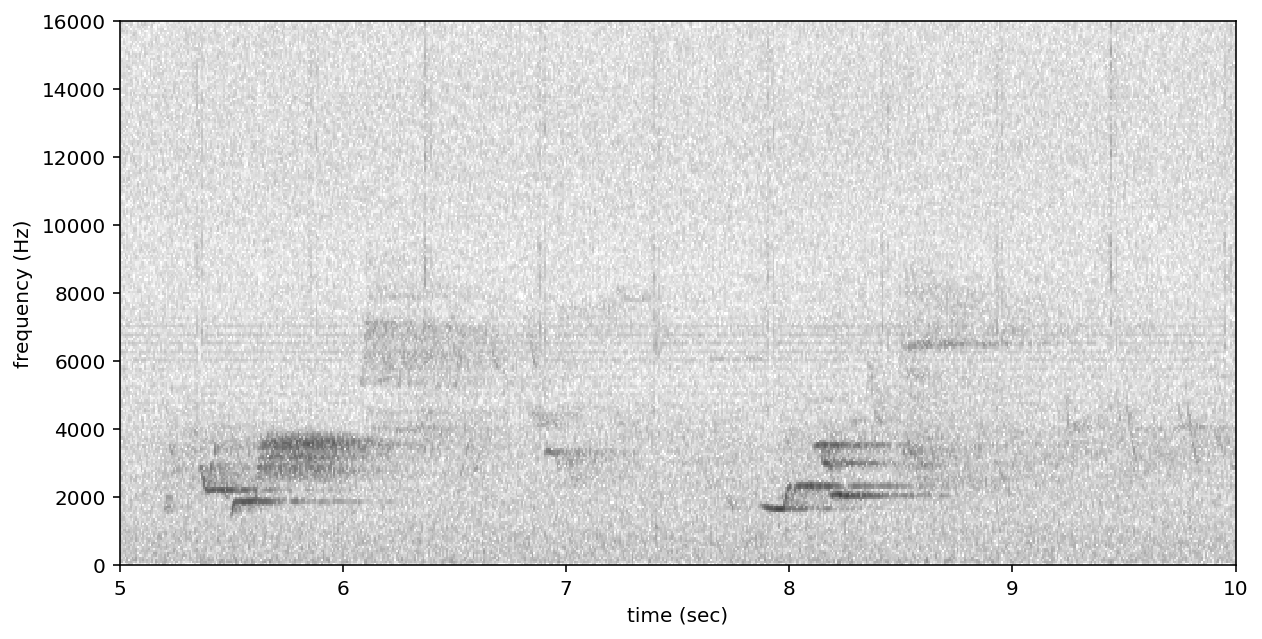

score for Wood Thrush class [0-1]: 1.000


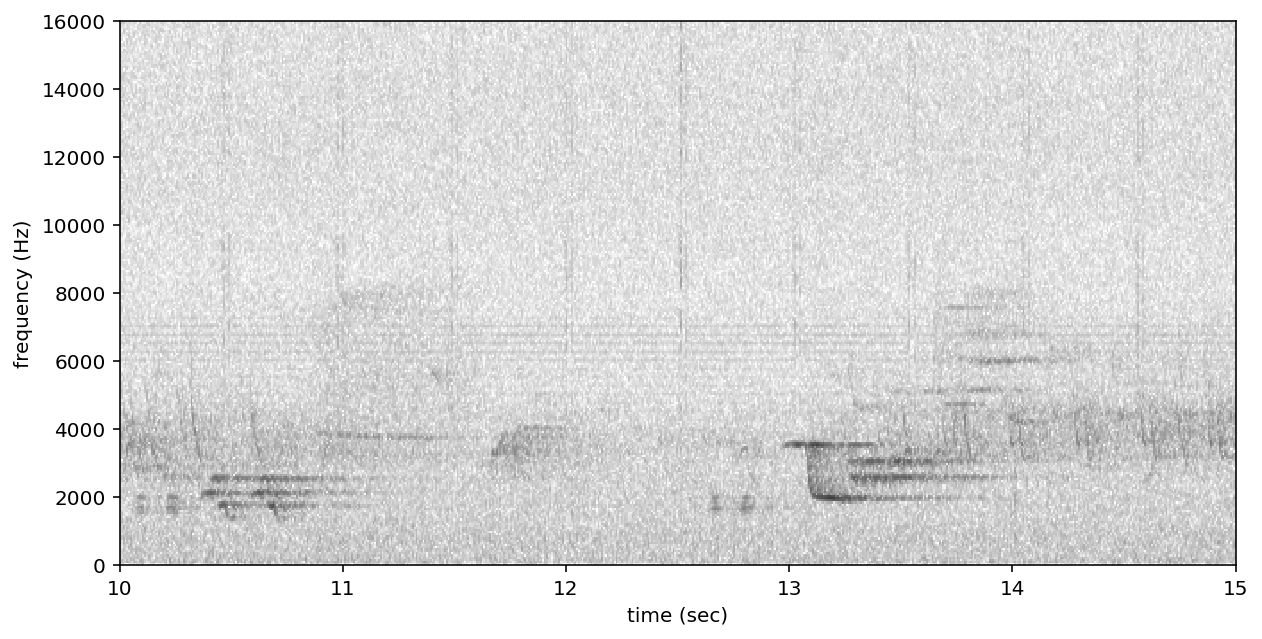

score for Wood Thrush class [0-1]: 1.000


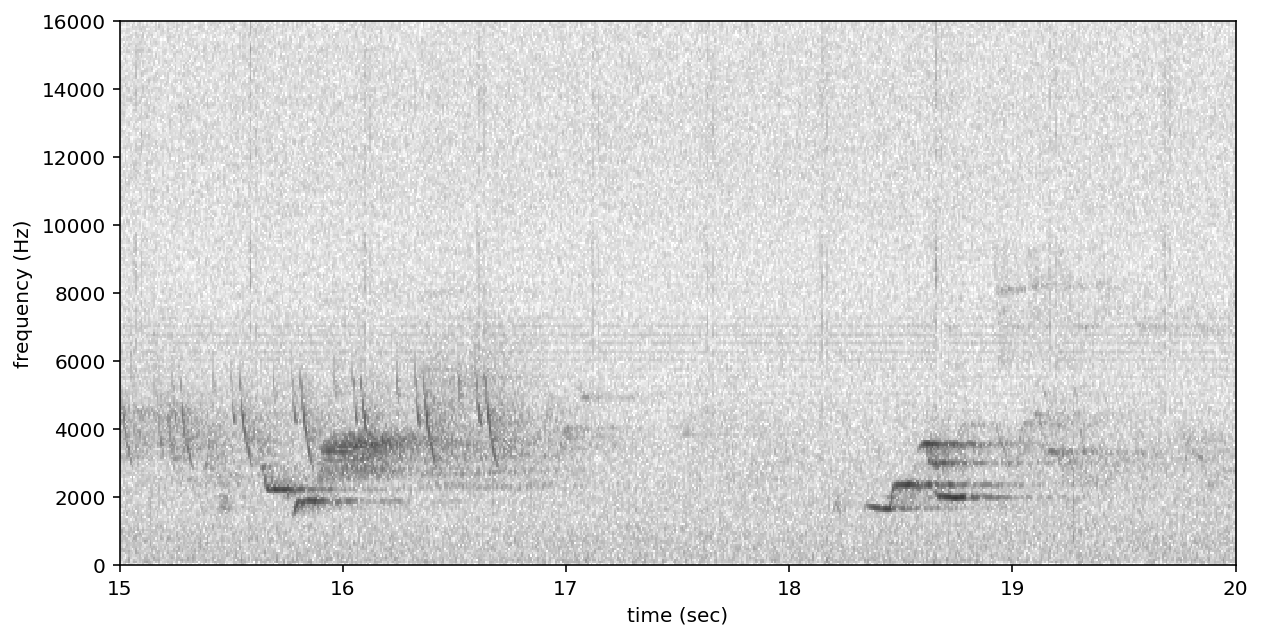

score for Wood Thrush class [0-1]: 0.161


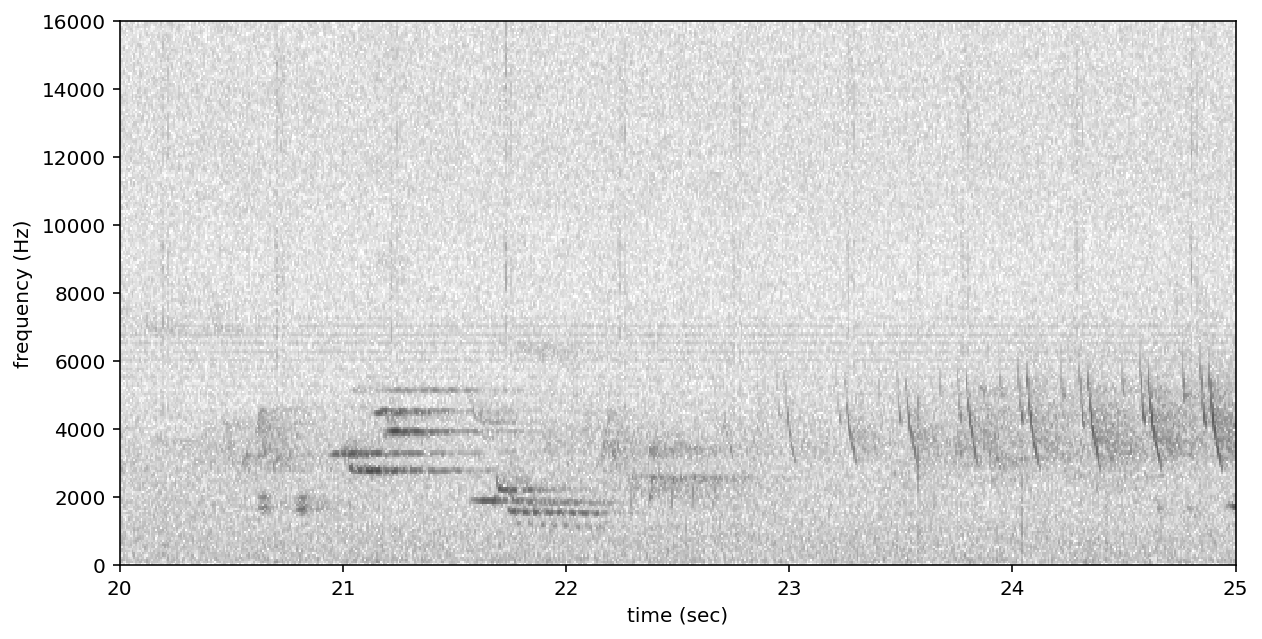

In [95]:
for (file,clip_start_time,clip_end_time), row in preds.head(5).iterrows():
  print(f"score for Wood Thrush class [0-1]: {row['Wood Thrush']:0.3f}")
  spectrogram.trim(clip_start_time,clip_end_time).plot()

First, let's print the max score in the entire audio file for each species that scored above 0.1

In [96]:
np.round(preds.max()[preds.max()>0.1],3)

Northern Cardinal     1.000
Eastern Wood-pewee    0.761
Kentucky Warbler      0.994
Wood Thrush           1.000
Ovenbird              0.839
Red-eyed Vireo        0.239
dtype: float32

Now let's look at clips that scored over 0.1 for a species of our choice:

score for Ovenbird class [0-1]: 0.839


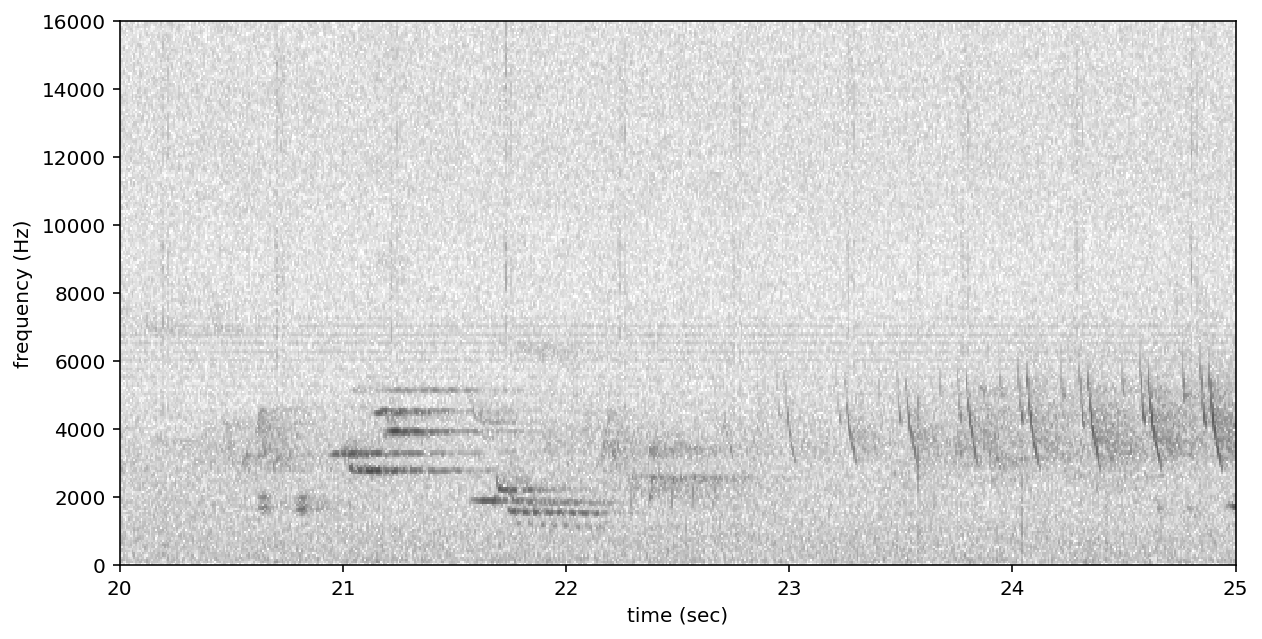

score for Ovenbird class [0-1]: 0.581


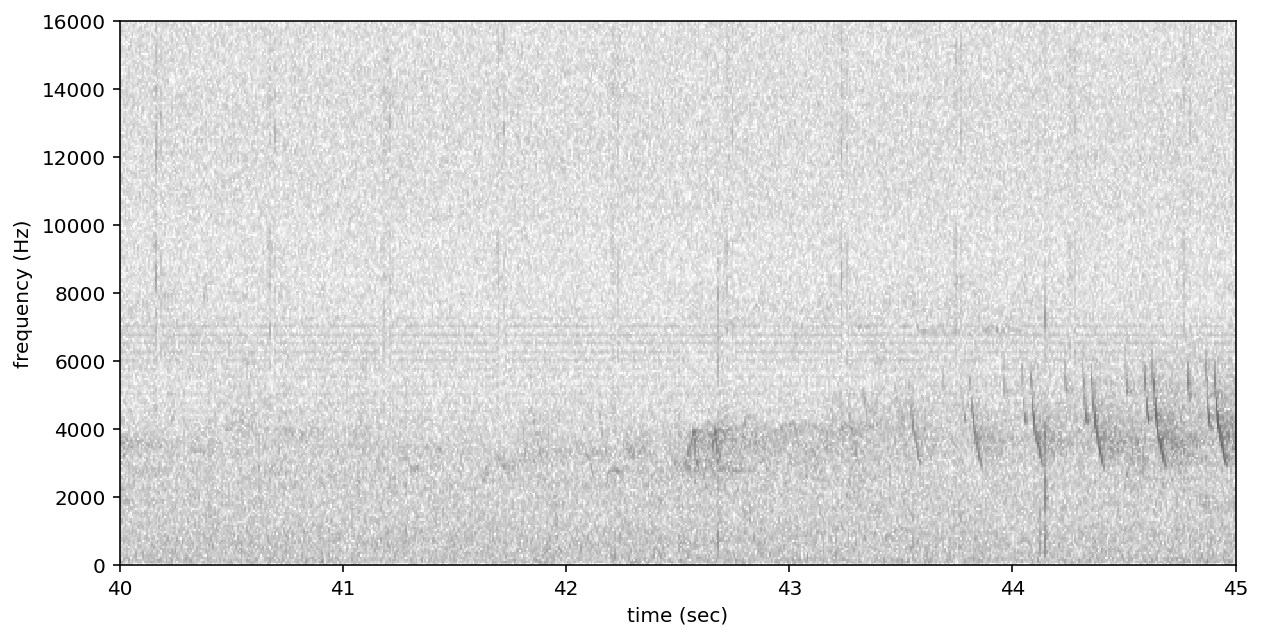

In [97]:
species = "Ovenbird"
for (file,clip_start_time,clip_end_time), row in preds.iterrows():
  if row[species]>0.1:
    print(f"score for {species} class [0-1]: {row[species]:0.3f}")
    spectrogram.trim(clip_start_time,clip_end_time).plot()

Repeat this analysis with a species of your choice. The text you type must exactly match one of the species names in the model, including capitalization and punctuation. See the list below for all options. 

In [98]:
model.classes

['Red-winged Blackbird',
 'Tufted Titmouse',
 'Cedar Waxwing',
 'Canada Goose',
 'Red-Shouldered Hawk',
 'Northern Cardinal',
 'Verry',
 'Hermit Thrush',
 "Swainson's Thrush",
 'Brown Creeper',
 'Yellow-bellied Cuckoo',
 'Northern Flicker',
 'Eastern Wood-pewee',
 'American Crow',
 'Common Raven',
 'Blue Jay',
 'Downy Woodpecker',
 'Pileated Woodpecker',
 'Kentucky Warbler',
 'Common Yellowthroat',
 'Wood Thrush',
 'Baltimore Oriole',
 'Nashville Warbler',
 'Hairy Woodpecker',
 'Red-bellied Woodpecker',
 'Wild Turkey',
 'Black-and-white Warbler',
 'Brown-headed Cowbird',
 'Louisiana Waterthrush',
 'Rose-breasted Grosbeak',
 'Eastern Towhee',
 'Scarlet Tanager',
 'Black-capped Chickadee',
 'Blue-gray Gnatcatcher',
 'Ruby-crowned Kinglet',
 'Ovenbird',
 'Hooded Warbler',
 'Blackburnian Warbler',
 'Chestnut-sided Warbler',
 'American Redstart',
 'Black-throated Green Warbler',
 'White-breasted Nuthatch',
 'American Goldfinch',
 'Carolina Wren',
 'American Robin',
 'Blue-winged Warbler',
 

In [ ]:
species = "Enter Species Name"

if sum(preds[species] > 0.1) ==0:
  print("No scores above 0.1 for this species")

for (file,clip_start_time,clip_end_time), row in preds.iterrows():
  if row[species]>0.1:
    print(f"score for {species} class [0-1]: {row[species]:0.3f}")
    spectrogram.trim(clip_start_time,clip_end_time).plot()

## What is the classifier actually seeing?
Classifiers don't actually look at the nice big spectrograms we have been plotting. Instead, they have to work with a much smaller image size constrained by the architecture of the model. For example the popular `ResNet` CNN architectures require `224x224` pixel images. Lets take a look at the images the model is actually making predictions on:



In [100]:
from opensoundscape.preprocess.utils import show_tensor_grid, show_tensor
from opensoundscape.torch.datasets import AudioSplittingDataset

In [101]:
dataset = AudioSplittingDataset([filename], model.preprocessor)
# augmentation is something that happens during training time, so we're going to turn it off here
dataset.bypass_augmentations = True

The image is really just a matrix of pixel intensity values. Lets look at the values and plot the first five spectrograms as actually seen by the model.

In [103]:
tensors = [dataset[i]['X'].expand(3,224,224) for i in range(5)]
tensors[0]

tensor([[[-0.5043, -0.5868, -0.4754,  ..., -0.5184, -0.5464, -0.5238],
         [-0.4797, -0.5457, -0.4861,  ..., -0.5432, -0.6443, -0.6232],
         [-0.4953, -0.5182, -0.5126,  ..., -0.5666, -0.6377, -0.6166],
         ...,
         [-0.2731, -0.2824, -0.1860,  ..., -0.3987, -0.2948, -0.2109],
         [-0.3098, -0.4004, -0.2196,  ..., -0.4290, -0.3554, -0.3155],
         [-0.4661, -0.6741, -0.3420,  ..., -0.5286, -0.4738, -0.5157]],

        [[-0.5043, -0.5868, -0.4754,  ..., -0.5184, -0.5464, -0.5238],
         [-0.4797, -0.5457, -0.4861,  ..., -0.5432, -0.6443, -0.6232],
         [-0.4953, -0.5182, -0.5126,  ..., -0.5666, -0.6377, -0.6166],
         ...,
         [-0.2731, -0.2824, -0.1860,  ..., -0.3987, -0.2948, -0.2109],
         [-0.3098, -0.4004, -0.2196,  ..., -0.4290, -0.3554, -0.3155],
         [-0.4661, -0.6741, -0.3420,  ..., -0.5286, -0.4738, -0.5157]],

        [[-0.5043, -0.5868, -0.4754,  ..., -0.5184, -0.5464, -0.5238],
         [-0.4797, -0.5457, -0.4861,  ..., -0

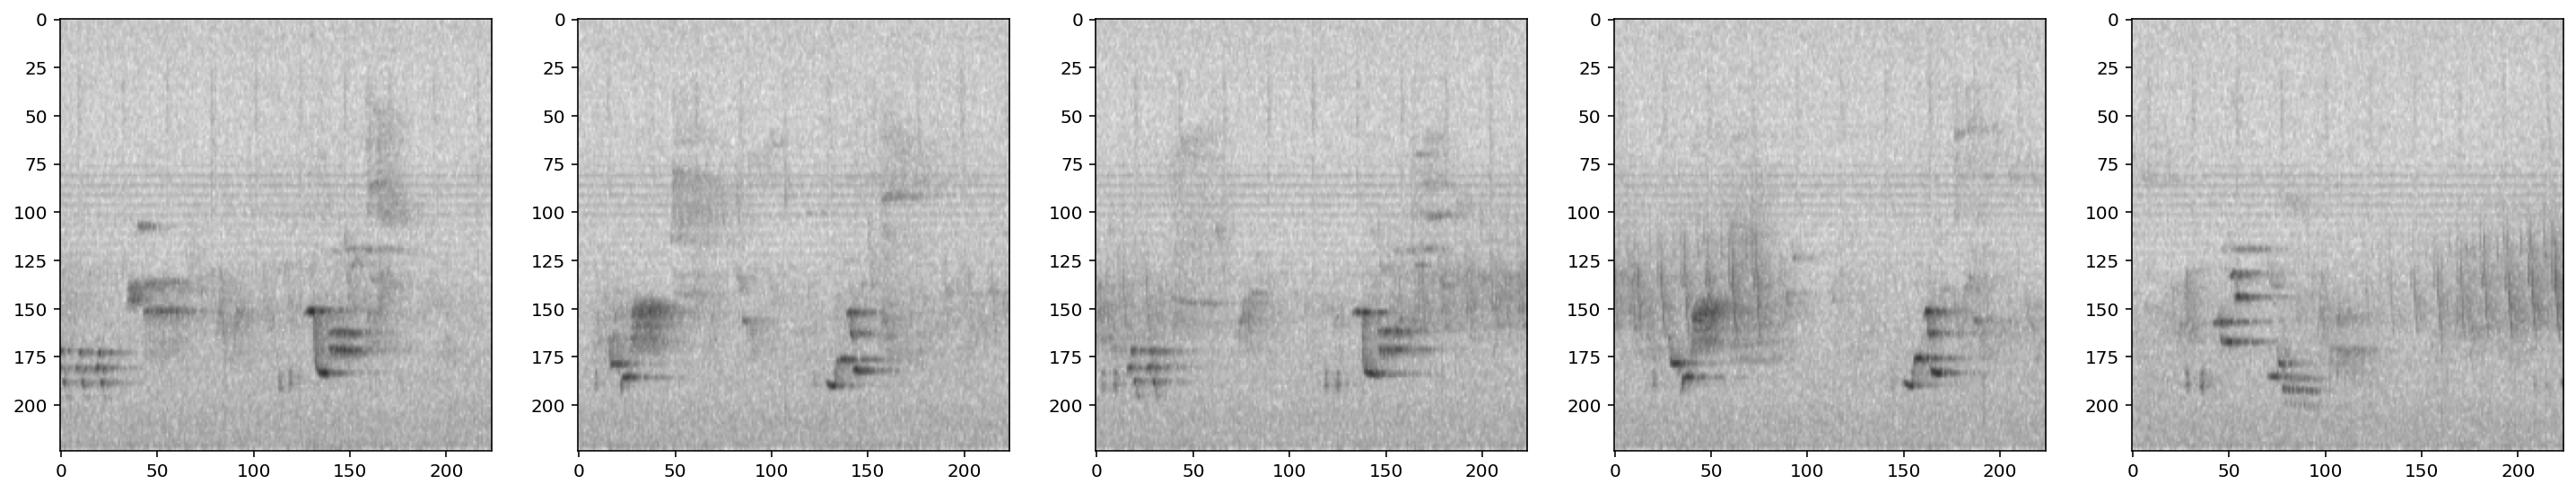

In [104]:
_ = show_tensor_grid(tensors,5)